<a href="https://colab.research.google.com/github/Yassmine-Yazidi-573/MUN-winner-Predictor/blob/main/MUN_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [167]:

data=pd.read_csv('mun_participants_dataset.csv')
data.head()

,Delegation,Committee,Previous_MUNs,Previous_Resolutions_Sponsored,Previous_Awards,Experience_Level,Speeches_Given,Points_of_Information,Presence,Chairs_Penalties,Award_Won
0,Germany,UNHRC,6,5,0,4,5,3,93.129099,0,0
1,Brazil,UNSC,3,2,2,5,4,4,94.222172,0,0
2,USA,UNDP,4,4,2,5,7,4,98.830980,1,0
3,China,UNSC,2,2,1,3,8,8,100.000000,0,0
4,Germany,UNDP,1,1,3,3,6,5,100.000000,0,0


In [168]:
data.shape

(100, 11)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Delegation                      100 non-null    object 
 1   Committee                       100 non-null    object 
 2   Previous_MUNs                   100 non-null    int64  
 3   Previous_Resolutions_Sponsored  100 non-null    int64  
 4   Previous_Awards                 100 non-null    int64  
 5   Experience_Level                100 non-null    int64  
 6   Speeches_Given                  100 non-null    int64  
 7   Points_of_Information           100 non-null    int64  
 8   Presence                        100 non-null    float64
 9   Chairs_Penalties                100 non-null    int64  
 10  Award_Won                       100 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 8.7+ KB


In [170]:
data.describe()

,Previous_MUNs,Previous_Resolutions_Sponsored,Previous_Awards,Experience_Level,Speeches_Given,Points_of_Information,Presence,Chairs_Penalties,Award_Won
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.120000,2.660000,1.160000,3.100000,9.670000,3.750000,94.692540,0.490000,0.300000
std,1.929463,1.892142,0.884433,1.374369,3.210006,2.066447,4.195439,0.771919,0.460566
min,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,83.718750,0.000000,0.000000
25%,2.000000,1.000000,1.000000,2.000000,7.000000,2.000000,91.544095,0.000000,0.000000
50%,3.000000,2.000000,1.000000,3.000000,9.000000,4.000000,94.676896,0.000000,0.000000
75%,4.000000,4.000000,2.000000,4.000000,12.000000,5.000000,98.878134,1.000000,1.000000
max,8.000000,7.000000,3.000000,5.000000,19.000000,9.000000,100.000000,4.000000,1.000000


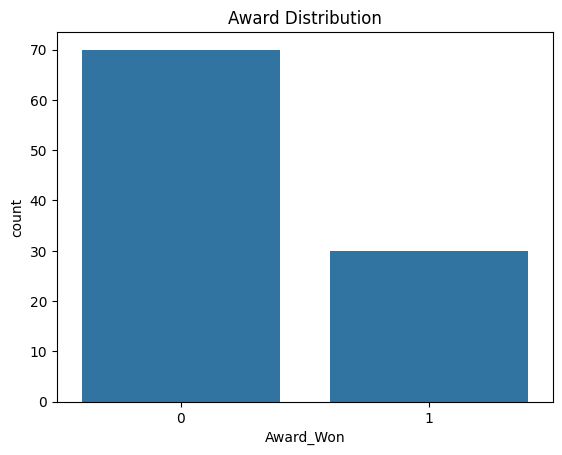

In [171]:
sns.countplot(data=data, x='Award_Won')
plt.title("Award Distribution")
plt.show()

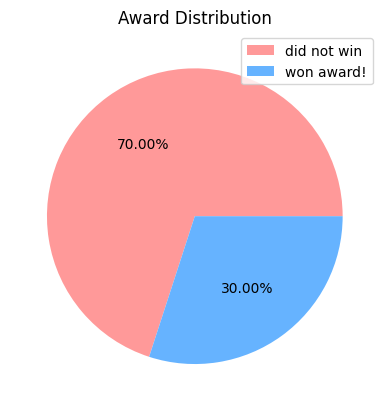

In [172]:
awards_counts= data['Award_Won'].value_counts()
labels=['did not win', 'won award!']
sizes=[awards_counts[0], awards_counts[1]]
colors=['#ff9999','#66b3ff']
plt.pie(sizes, colors=colors, autopct='%.2f%%')
plt.title("Award Distribution")
plt.legend(labels)
plt.show()

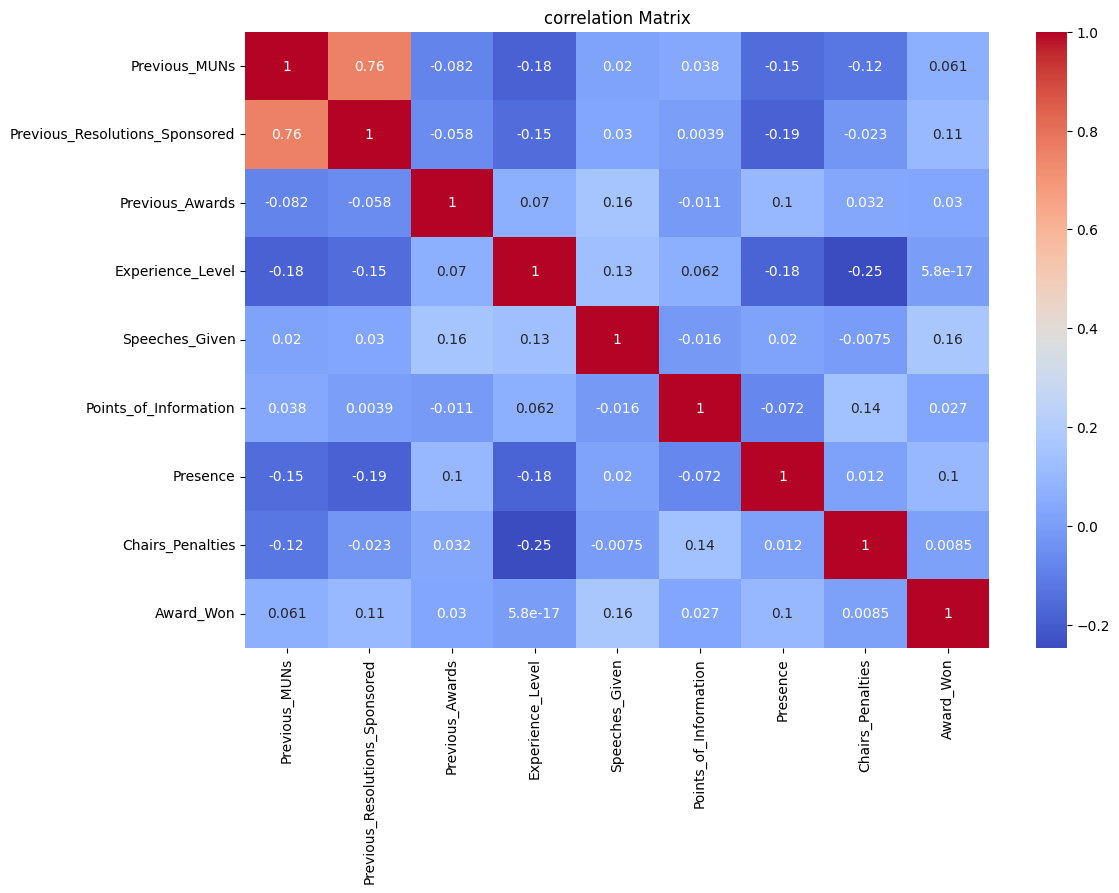

In [173]:
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("correlation Matrix")
plt.show()

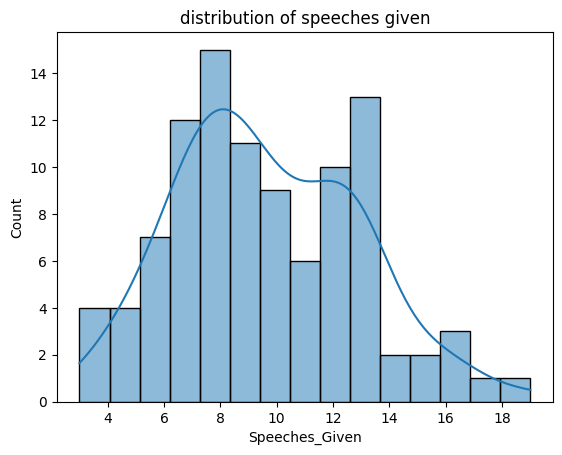

In [174]:
sns.histplot(data['Speeches_Given'], bins=15 , kde=True)
plt.title("distribution of speeches given")
plt.show()

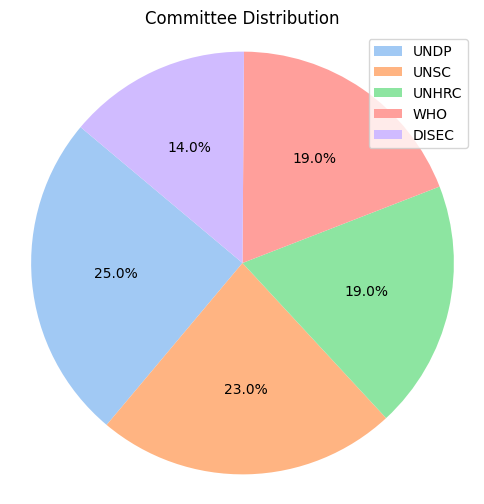

In [208]:
committee_counts= data['Committee'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(committee_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.legend(labels=committee_counts.index, loc="best")
plt.title("Committee Distribution")
plt.axis('equal')
plt.show()

Modeling: Logistic Regression

In [176]:
data_encoded=pd.get_dummies(data, columns=["Committee", "Delegation"], drop_first=True)
data_encoded.head()

,Previous_MUNs,Previous_Resolutions_Sponsored,Previous_Awards,Experience_Level,Speeches_Given,Points_of_Information,Presence,Chairs_Penalties,Award_Won,Committee_UNDP,...,Committee_WHO,Delegation_China,Delegation_France,Delegation_Germany,Delegation_India,Delegation_Japan,Delegation_Nigeria,Delegation_Russia,Delegation_UK,Delegation_USA
0,6,5,0,4,5,3,93.129099,0,0,False,...,False,False,False,True,False,False,False,False,False,False
1,3,2,2,5,4,4,94.222172,0,0,False,...,False,False,False,False,False,False,False,False,False,False
2,4,4,2,5,7,4,98.830980,1,0,True,...,False,False,False,False,False,False,False,False,False,True
3,2,2,1,3,8,8,100.000000,0,0,False,...,False,True,False,False,False,False,False,False,False,False
4,1,1,3,3,6,5,100.000000,0,0,True,...,False,False,False,True,False,False,False,False,False,False


In [177]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Previous_MUNs                   100 non-null    int64  
 1   Previous_Resolutions_Sponsored  100 non-null    int64  
 2   Previous_Awards                 100 non-null    int64  
 3   Experience_Level                100 non-null    int64  
 4   Speeches_Given                  100 non-null    int64  
 5   Points_of_Information           100 non-null    int64  
 6   Presence                        100 non-null    float64
 7   Chairs_Penalties                100 non-null    int64  
 8   Award_Won                       100 non-null    int64  
 9   Committee_UNDP                  100 non-null    bool   
 10  Committee_UNHRC                 100 non-null    bool   
 11  Committee_UNSC                  100 non-null    bool   
 12  Committee_WHO                   100 n

In [178]:
data_encoded.shape

(100, 22)

In [179]:
# For Delegation columns
data_encoded['Delegation_China'] = data_encoded['Delegation_China'].map({True: 1, False: 0})
data_encoded['Delegation_France'] = data_encoded['Delegation_France'].map({True: 1, False: 0})
data_encoded['Delegation_USA'] = data_encoded['Delegation_USA'].map({True: 1, False: 0})
data_encoded['Delegation_UK'] = data_encoded['Delegation_UK'].map({True: 1, False: 0})
data_encoded['Delegation_India'] = data_encoded['Delegation_India'].map({True: 1, False: 0})
data_encoded['Delegation_Russia'] = data_encoded['Delegation_Russia'].map({True: 1, False: 0})
data_encoded['Delegation_Germany'] = data_encoded['Delegation_Germany'].map({True: 1, False: 0})
data_encoded['Delegation_Japan'] = data_encoded['Delegation_Japan'].map({True: 1, False: 0})
data_encoded['Delegation_Nigeria'] = data_encoded['Delegation_Nigeria'].map({True: 1, False: 0})
# For Committee columns
data_encoded['Committee_UNDP'] = data_encoded['Committee_UNDP'].map({True: 1, False: 0})
data_encoded['Committee_UNHRC'] = data_encoded['Committee_UNHRC'].map({True: 1, False: 0})
data_encoded['Committee_UNSC'] = data_encoded['Committee_UNSC'].map({True: 1, False: 0})
data_encoded['Committee_WHO'] = data_encoded['Committee_WHO'].map({True: 1, False: 0})

In [180]:
data_encoded.head()

,Previous_MUNs,Previous_Resolutions_Sponsored,Previous_Awards,Experience_Level,Speeches_Given,Points_of_Information,Presence,Chairs_Penalties,Award_Won,Committee_UNDP,...,Committee_WHO,Delegation_China,Delegation_France,Delegation_Germany,Delegation_India,Delegation_Japan,Delegation_Nigeria,Delegation_Russia,Delegation_UK,Delegation_USA
0,6,5,0,4,5,3,93.129099,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,2,2,5,4,4,94.222172,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4,2,5,7,4,98.830980,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2,2,1,3,8,8,100.000000,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,3,3,6,5,100.000000,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [181]:
x=data_encoded.drop('Award_Won', axis=1)
y=data_encoded['Award_Won']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

We will divide the dataset into two parts:
*   training data of 80% ( 80 observations)
*   testing data of 20% (20 observations)

In [182]:
y_pred=model.predict(x_test)
print("classification report:\n", classification_report(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy score:\n", accuracy_score(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67        14
           1       0.00      0.00      0.00         6

    accuracy                           0.50        20
   macro avg       0.31      0.36      0.33        20
weighted avg       0.44      0.50      0.47        20

confusion matrix:
 [[10  4]
 [ 6  0]]
accuracy score:
 0.5


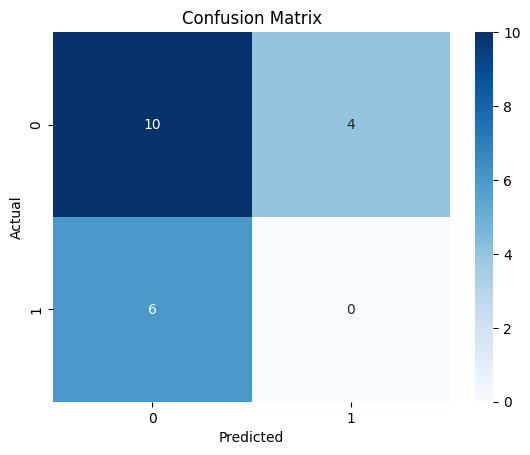

In [183]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

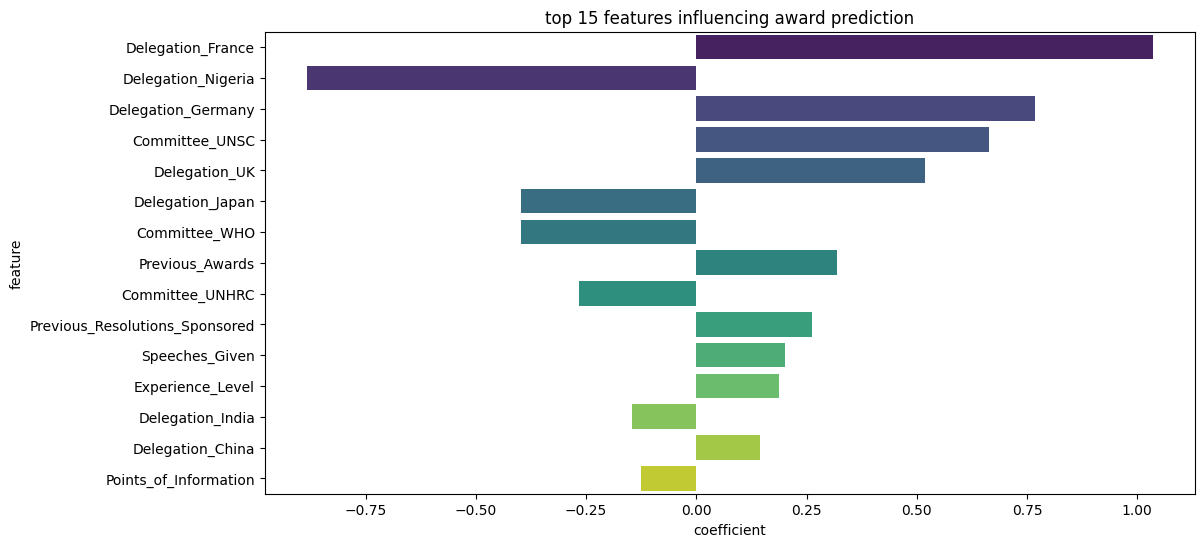

In [186]:
coef=pd.DataFrame({
    "feature": x.columns,
    "coefficient": model.coef_[0]
    }).sort_values(by='coefficient', key=abs, ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=coef.head(15), x='coefficient', y='feature', hue="feature", palette="viridis")
plt.title("top 15 features influencing award prediction")
plt.show()

Applying the Logitic regression model on the training Dataset:

In [187]:
model = sm.Logit(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.439077
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Award_Won   No. Observations:                   80
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                           21
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  0.2812
Time:                        16:18:18   Log-Likelihood:                -35.126
converged:                       True   LL-Null:                       -48.869
Covariance Type:            nonrobust   LLR p-value:                    0.1553
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -16.4905     10.138     -1.627     

# **The Model's Equation is the following:** ⏬

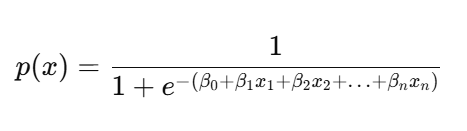


*   Bo=Intercept
*   Bi=coefficients(values found above)

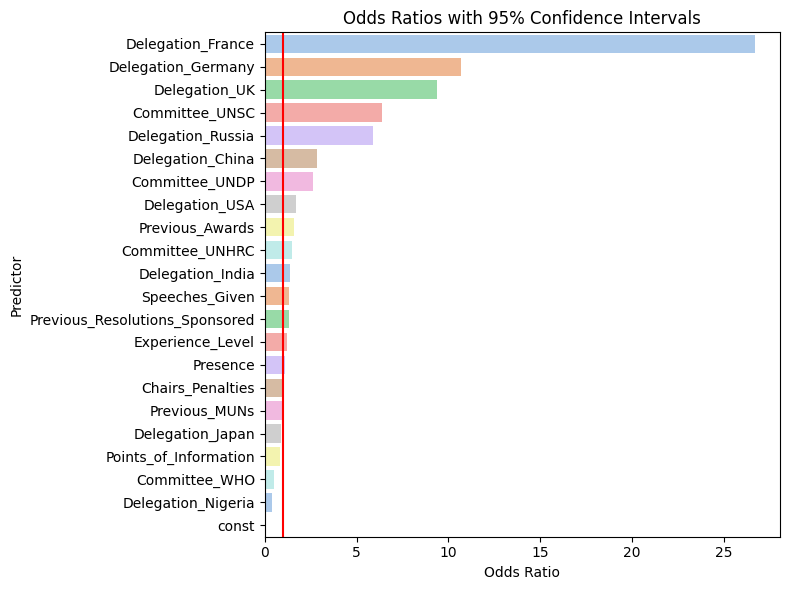

In [197]:
# Extract coefficients and calculate odds ratios
odds_ratios = np.exp(model.params)
conf = model.conf_int()
conf['OR'] = odds_ratios
conf.columns = ['2.5%', '97.5%', 'OR']
# Create a DataFrame
or_df = conf[['OR', '2.5%', '97.5%']].sort_values(by='OR', ascending=False)
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='OR', y=or_df.index, data=or_df,hue=or_df.index, palette='pastel', orient='h')
plt.axvline(x=1, color='red', linestyle='solid')
plt.title('Odds Ratios with 95% Confidence Intervals')
plt.xlabel('Odds Ratio')
plt.ylabel('Predictor')
plt.tight_layout()
plt.show()

## **Prediction for a specific delegate:**
*   committee=UNDP
*   delegation=France

In [198]:
# Example delegate data
delegate_data = {
    'Previous_MUNs': [10],
    'Previous_Resolutions_Sponsored': [6],
    'Previous_Awards': [6],
    'Experience_Level': [4],
    'Speeches_Given': [15],
    'Points_of_Information': [5],
    'Presence': [100],
    'Chairs_Penalties': [0],
    'Committee_UNDP': [1],
    'Committee_UNHRC': [0],
    'Committee_UNSC': [0],
    'Committee_WHO': [0],
    'Delegation_China': [0],
    'Delegation_France': [1],
    'Delegation_Germany': [0],
    'Delegation_India': [0],
    'Delegation_Japan': [0],
    'Delegation_Nigeria': [0],
    'Delegation_Russia': [0],
    'Delegation_UK': [0],
    'Delegation_USA': [0]
}

delegate_df = pd.DataFrame(delegate_data)

In [199]:
delegate_df = delegate_df.astype(float)
delegate_df = sm.add_constant(delegate_df, has_constant='add')
probability = model.predict(delegate_df)[0]
# Predict class
prediction = (probability >= 0.5).astype(int)
print(f"Predicted Probability of Winning: {probability:.2f}")
print(f"Predicted Class: {'Won' if prediction == 1 else 'Did Not Win'}")

Predicted Probability of Winning: 1.00
Predicted Class: Won


## **Trying to work with RandomForest**

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [203]:
rf_pred=rf_model.predict(x_test)
print("classification report:\n", classification_report(y_test, rf_pred))
print("confusion matrix:\n", confusion_matrix(y_test, rf_pred))
print("accuracy score:\n", accuracy_score(y_test, rf_pred))

classification report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.00      0.00      0.00         6

    accuracy                           0.55        20
   macro avg       0.32      0.39      0.35        20
weighted avg       0.45      0.55      0.50        20

confusion matrix:
 [[11  3]
 [ 6  0]]
accuracy score:
 0.55


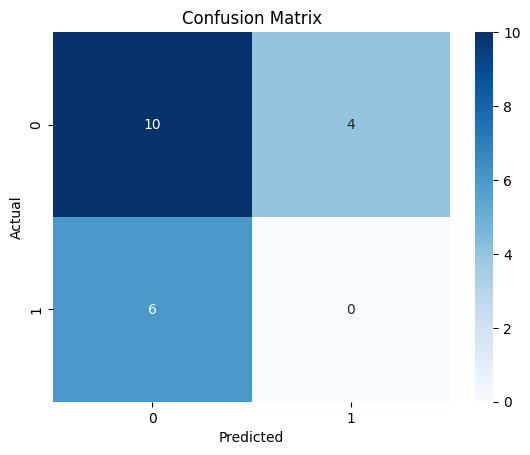

In [204]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(0.5, 1.0, 'top 15 features influencing award prediction')

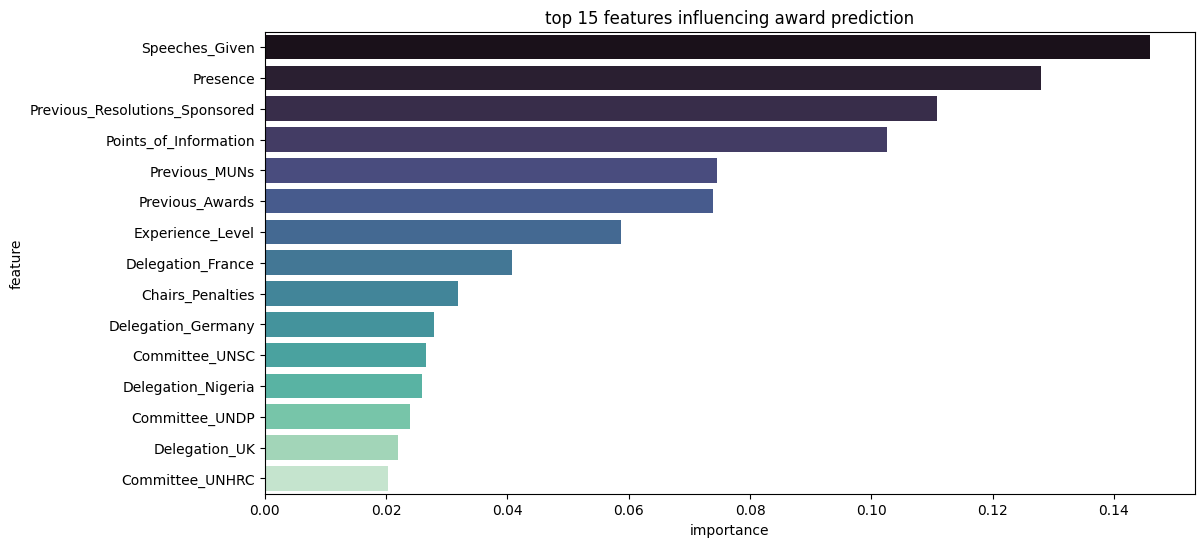

In [205]:
feature_importance=pd.DataFrame({
    "feature": x.columns,
    "importance": rf_model.feature_importances_
    }).sort_values(by='importance', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature', hue="feature", palette="mako")
plt.title("top 15 features influencing award prediction")

**As we can see the RandomForest gave better reflection on features importance: It makes more sense that the speeches given and delegates presence contribute more to award winning and his delegation or committee has nothing to do with the target variable.**